    A atividade descrita foi inspirada no artigo "Python Geopandas package for shapefile management", de Yonas Mersha (26 de julho de 2021), que aborda o uso do Pacote Geopandas para a manipulação e análise de dados espaciais. O objetivo da tarefa é aplicar os procedimentos descritos no texto para visualizar áreas em Minas Gerais com solos que possam ser adequados para o plantio de florestas de rápido crescimento, como o Cedro australiano.

    Os dados utilizados para esta análise foram obtidos por meio da Plataforma IDE Sisema, com a camada "Mapa de Solos de Minas Gerais". Essa camada fornece informações sobre as classes de solos no estado, permitindo identificar regiões que apresentam características favoráveis para o cultivo de determinadas espécies florestais.

    Vale destacar que, embora a análise de solos seja um fator importante para determinar a viabilidade do plantio, outros elementos também desempenham um papel crucial. Fatores como temperatura, precipitação, altitude, uso e ocupação atual do solo, entre outros, devem ser levados em consideração para identificar, de fato, as áreas mais adequadas para o cultivo de espécies florestais
    

In [4]:
import geopandas as gpd

# Carregar o o arquivo gpkg
caminho_arquivo = "C:/Users/guilh/OneDrive/Documentos/TopoGeo_Arq_Uteis/solos_mg_sisema/ide_1502_mg_mapa_solos_pol/solos_mg.gpkg"

# Carregando o arquivo GeoPackage
gdf = gpd.read_file(caminho_arquivo)

# Imprimindo as primeiras linhas do GeoDataFrame
print(gdf.head())

   objectid_1 um_sequenc  shape_leng  shape_area  \
0           5     CXbd11    0.189131    0.001049   
1          10     CXbd13    0.181950    0.001336   
2          11     CXbd13    0.196156    0.001355   
3          12     CXbd13   14.124038    0.145806   
4          16     CXbd13    0.153414    0.000864   

                            legenda  \
0  Cambissolo h�plico Tb distr�fico   
1  Cambissolo h�plico Tb distr�fico   
2  Cambissolo h�plico Tb distr�fico   
3  Cambissolo h�plico Tb distr�fico   
4  Cambissolo h�plico Tb distr�fico   

                                            geometry  
0  MULTIPOLYGON (((-48.56558 -18.39054, -48.56251...  
1  MULTIPOLYGON (((-45.5132 -17.70468, -45.51574 ...  
2  MULTIPOLYGON (((-45.47021 -17.54549, -45.46794...  
3  MULTIPOLYGON (((-45.72133 -17.94786, -45.72773...  
4  MULTIPOLYGON (((-47.08433 -17.3137, -47.08135 ...  


C:\Users\guilh\anaconda3\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'solos_mg.gpkg': 'ide_1502_mg_mapa_solos_pol' (default), 'reprojetadoa', 'solos_mg__ide_1502_mg_mapa_solos_pol'. Specify layer parameter to avoid this warning.
  result = read_func(


A visualização do Mapa de Solos de Minas Gerais, seguiu as seguintes etapas:

1) Carregamento dos Dados: O arquivo GeoPackage contendo os dados de solos é carregado.

2) Verificação do Sistema de Coordenadas: O código verifica o sistema de coordenadas do arquivo e, caso não esteja em SIRGAS 2000 (EPSG:4674), converte para esse sistema.

3) Carregamento do Limite de Minas Gerais: Carrega outro arquivo contendo o limite geográfico do estado de Minas Gerais.

4) Plotagem do Mapa: Cria um gráfico onde as áreas são coloridas de acordo com a classe de solo (usando o atributo 'um_sequenc') e sobrepõe o limite do estado de Minas Gerais, destacando-o com uma borda preta.

5) Exibição: O mapa gerado é exibido com o título "Mapa de Solos de Minas Gerais"

C:\Users\guilh\anaconda3\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'solos_mg.gpkg': 'ide_1502_mg_mapa_solos_pol' (default), 'reprojetadoa', 'solos_mg__ide_1502_mg_mapa_solos_pol'. Specify layer parameter to avoid this warning.
  result = read_func(


Sistema de coordenadas atual: EPSG:4674


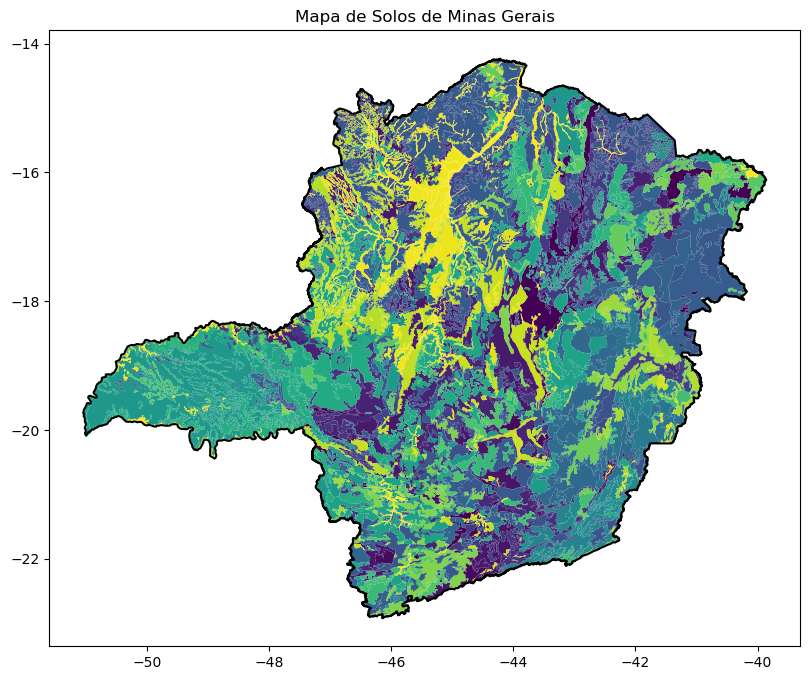

In [5]:
import matplotlib.pyplot as plt

# Carregando o arquivo GeoPackage
mapa_solos = gpd.read_file(caminho_arquivo)

# Verificando o sistema de coordenadas atual
print(f"Sistema de coordenadas atual: {mapa_solos.crs}")

# Se o sistema de coordenadas não for SIRGAS 2000 (EPSG:4674), converta
if mapa_solos.crs != 'EPSG:4674':
    mapa_solos = mapa_solos.to_crs(epsg=4674)

# Carregar o limite do estado de MG
caminho_arquivo2 = "C:/Users/guilh/OneDrive/Documentos/TopoGeo_Arq_Uteis/limites_geograficos/MG_limites_UTM_2000.gpkg"
mg_limite = gpd.read_file(caminho_arquivo2)

# Plotando o mapa com cores distintas para cada classe de solo
fig, ax = plt.subplots(figsize=(12, 8))
mapa_solos.plot(column='um_sequenc', cmap='viridis', legend=False, ax=ax)

# Sobrepor a delimitação do estado de MG
mg_limite.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.5)

# Adicionando título ao mapa
plt.title('Mapa de Solos de Minas Gerais')

# Exibindo o mapa
plt.show()

    Foi criado um novo DataFrame df_legenda_sequencia contendo as colunas 'legenda' e 'um_sequenc' do GeoDataFrame gdf. A função drop_duplicates() foi aplicada para garantir que apenas os valores únicos dessas colunas fossem mantidos, removendo quaisquer duplicatas. O resultado é uma tabela que exibe as combinações únicas de 'legenda' e 'um_sequenc', permitindo a visualização das diferentes classes de solo e suas respectivas legendas sem repetições.

In [6]:
import pandas as pd

# Criando um novo DataFrame com as colunas 'legenda' e 'um_sequenc'
df_legenda_sequencia = gdf[['legenda', 'um_sequenc']].drop_duplicates()

# Exibindo a tabela com os valores únicos das colunas 'legenda' e 'um_sequenc'
df_legenda_sequencia

,legenda,um_sequenc
0,Cambissolo h�plico Tb distr�fico,CXbd11
1,Cambissolo h�plico Tb distr�fico,CXbd13
22,Cambissolo h�plico Tb distr�fico,CXbd18
23,Cambissolo h�plico Tb distr�fico,CXbd19
25,Cambissolo h�plico Tb distr�fico,CXbd2
...,...,...
3356,Latossolo amarelo distr�fico,LAd7
3358,Argissolo vermelho distr�fico,PVd6
3359,Latossolo vermelho-amarelo distr�fico,LVAd79
3361,Latossolo vermelho-amarelo distr�fico,LVAd55


Analisando a lista de tipos de solo em Minas Gerais, podemos identificar algumas opções que, em geral, são consideradas adequadas para o cultivo de espécies florestais de rápido crescimento, como o Cedro Australiano:

Latossolos: Solos profundos, bem drenados e com boa capacidade de retenção de água.

Latossolo Vermelho-Amarelo Distrófico (LVAd1)
Latossolo Vermelho Distrófico (LVd1)
Latossolo Vermelho Distroférrico (LVdf1)
Latossolo Vermelho Eutroférrico (LVef1)
Latossolo Vermelho-Amarelo Distroférrico (LVAdf1)
Latossolo Vermelho-Amarelo Eutrófico (LVAe1)
Latossolo Vermelho Eutrófico (LVe1)

Argissolos: Solos com horizonte B textural, geralmente profundos e com boa drenagem:

Argissolo Vermelho-Amarelo Distrófico (PVAd7)
Argissolo Vermelho-Amarelo Eutrófico (PVAe13)
Argissolo Vermelho Distrófico (PVd1)
Argissolo Vermelho Eutrófico (PVe2)

Nitossolos: Solos bem estruturados, profundos e férteis:

Nitossolo Vermelho Eutrófico (NVe2)
Nitossolo Háplico Eutrófico (NXe1)
Nitossolo Vermelho Eutroférrico (NVef1)

Cambissolos: Solos jovens, com horizonte B incipiente, geralmente bem drenados.

Cambissolo Háplico Tb Eutrófico (CXbe5)
Cambissolo Háplico Tb Distrófico (CXbd11)
Cambissolo Háplico Tb Distroférrico (CXbdf1)

Dsstaca-se que a fertilidade do solo (classificada como distrófica ou eutrófica) influencia diretamente no desenvolvimento das plantas. Solos eutróficos possuem maior disponibilidade de nutrientes essenciais, favorecendo o crescimento de espécies como o cedro. Já os solos distróficos podem requerer correções e adubações adequadas para suprir as necessidades nutricionais das espécies.

In [7]:
# Definir a lista de classes de solo de interesse
solos_adequados = [
    'LVAd1', 'LVd1', 'LVdf1', 'LVef1', 'LVAdf1', 'LVAe1', 'LVe1',
    'PVAd7', 'PVAe13', 'PVd1', 'PVe2', 'NVe2', 'NXe1', 'NVef1',
    'CXbe5', 'CXbd11', 'CXbdf1'
]

# Filtrar o GeoDataFrame para manter apenas as classes desejadas
solos_filtrados = mapa_solos[mapa_solos['um_sequenc'].isin(solos_adequados)]

# Caminho para salvar o novo arquivo
novo_caminho = 'solos_adequados.gpkg'

# Salvar o novo GeoDataFrame em um arquivo GeoPackage
solos_filtrados.to_file(novo_caminho, driver='GPKG')

    Após verificação de quais solos podem ser adequados ao cultivo do Cedro, um mapa é gerado utilizando a biblioteca Matplotlib. A figura é configurada com o tamanho de 12x8 polegadas, e os dados de solos filtrados (solos_filtrados) são plotados com a cor representada pela coluna 'um_sequenc', utilizando a paleta de cores 'viridis'. A posição da legenda é configurada no canto inferior esquerdo, fora do mapa, com a fonte pequena.

Após isso, o limite do estado de Minas Gerais é sobreposto ao mapa com uma linha preta, destacando as fronteiras estaduais. O título do mapa é adicionado, e os eixos são removidos para uma visualização mais limpa e focada nos dados geoespaciais. Finalmente, o layout é ajustado automaticamente para garantir que os elementos do mapa sejam exibidos de forma clara, e o mapa é exibido na tela.

Sistema de coordenadas atual: EPSG:4674


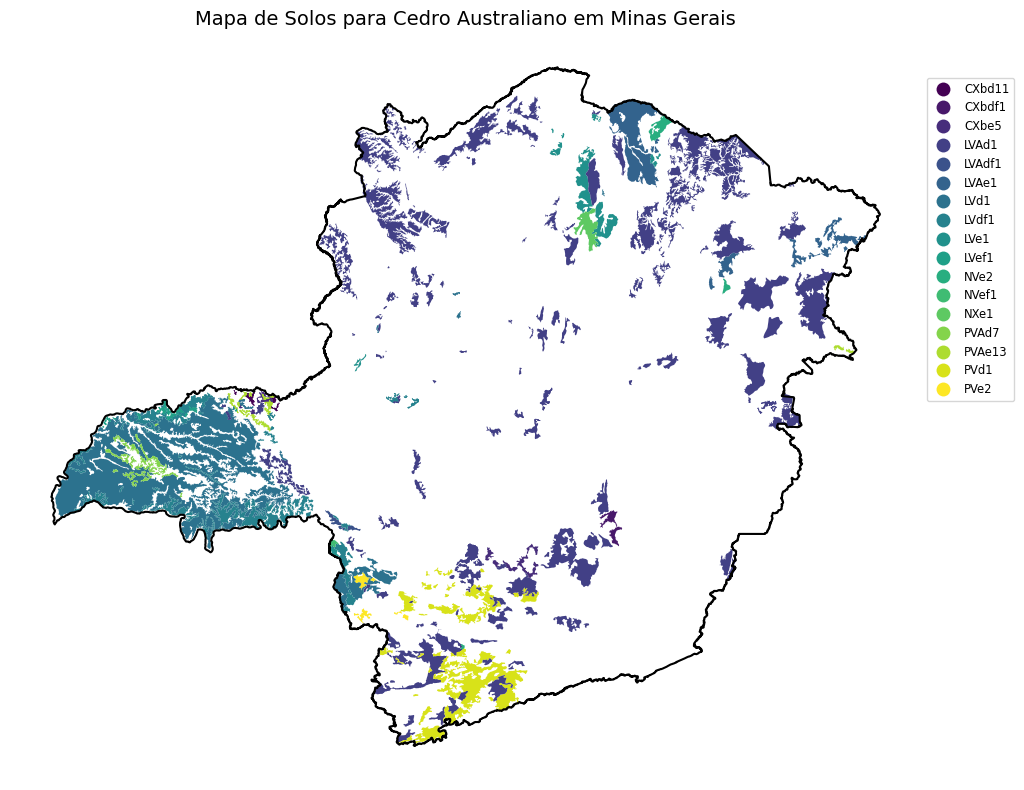

In [10]:
# Verificando o sistema de coordenadas atual
print(f"Sistema de coordenadas atual: {mg_limite.crs}")

# Se o sistema de coordenadas não for SIRGAS 2000 (EPSG:4674), converta
if mg_limite.crs != 'EPSG:4674':
    mg_limite = mg_limite.to_crs(epsg=4674)

# Plotando o mapa
fig, ax = plt.subplots(figsize=(12, 8))

# Definição do número de colunas para evitar que a legenda fique muito longa
num_colunas_legenda = 1

# Plotando os solos filtrados com legenda ajustada
solos_filtrados.plot(column='um_sequenc', cmap='viridis', legend=True, ax=ax,
                     legend_kwds={'loc': 'lower left', 'bbox_to_anchor': (1, 0.5),
                                  'ncol': num_colunas_legenda, 'fontsize': 'small'})

# Sobrepor a delimitação do estado de MG
mg_limite.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.5)

# Adicionando título ao mapa
ax.set_title('Mapa de Solos para Cedro Australiano em Minas Gerais', fontsize=14)

# Removendo eixos para um visual mais limpo
ax.set_axis_off()

# Ajustando layout para melhor visualização
plt.tight_layout()

# Exibindo o mapa
plt.show()

In [9]:
# Carregar o arquivo GeoPackage
area_solos_adequados = gpd.read_file('solos_adequados.gpkg')

# Verificando o sistema de coordenadas atual
print(f"Sistema de coordenadas atual: {area_solos_adequados.crs}")

# Se o sistema de coordenadas for geográfico (EPSG:4674), converta para UTM (EPSG:31983)
if area_solos_adequados.crs.is_geographic:
    area_solos_adequados = area_solos_adequados.to_crs(epsg=31983)

# Calculando a área de cada polígono em metros quadrados
area_solos_adequados['area_m2'] = area_solos_adequados.geometry.area

# Convertendo de metros quadrados para hectares (1 hectare = 10.000 metros quadrados)
area_solos_adequados['area_ha'] = area_solos_adequados['area_m2'] / 10000

# Agrupando por classe e somando a área em hectares
area_por_classe = area_solos_adequados.groupby('um_sequenc')['area_ha'].sum()

# Arredondando os valores para 2 casas decimais
area_por_classe = area_por_classe.round(2)

# Exibindo a área por classe
print(area_por_classe)


Sistema de coordenadas atual: EPSG:4674
um_sequenc
CXbd11      35749.68
CXbdf1      43652.89
CXbe5       97006.66
LVAd1     4571556.18
LVAdf1      26382.92
LVAe1      598297.93
LVd1      2853379.31
LVdf1      764052.45
LVe1       263298.43
LVef1       86023.47
NVe2        68818.59
NVef1        8383.05
NXe1        89724.29
PVAd7      130244.73
PVAe13     104867.60
PVd1       821829.04
PVe2        49470.58
Name: area_ha, dtype: float64


Por fim, realizou-se análise gráfica e estatística das áreas por classe de solo compatível com o Cedro Australiano. Gerou-se um gráfico de barras para visualizar a área total por classe de solo e identificou-se a classe com a maior e a menor área e calcula a área total de solos adequados para o plantio do Cedro Australiano e a área total de solos que podem ser adequados para os plantios é calculada.

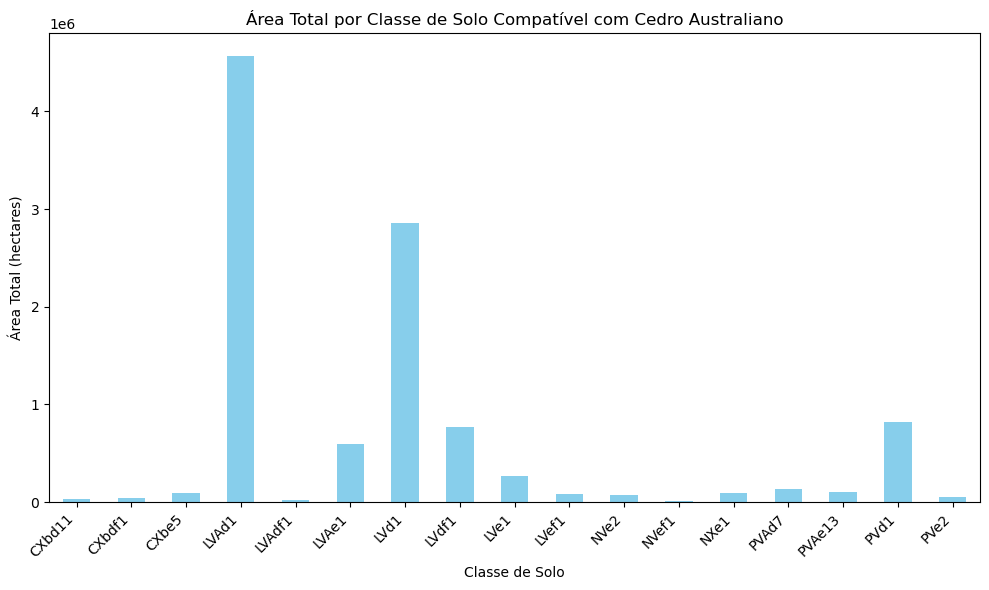


A classe com a maior área é: LVAd1 com 4571556.18 hectares.

A classe com a menor área é: NVef1 com 8383.05 hectares.

A área total de solos adequados para o Cedro Australiano é: 10612737.799999999 hectares.


In [12]:
# Análise gráfica
plt.figure(figsize=(10, 6))
area_por_classe.plot(kind='bar', color='skyblue')
plt.title('Área Total por Classe de Solo Compatível com Cedro Australiano')
plt.xlabel('Classe de Solo')
plt.ylabel('Área Total (hectares)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os labels do eixo x para melhor visualização
plt.tight_layout()
plt.show()

# Encontrando a classe com a maior área
classe_maior_area = area_por_classe.idxmax()
area_maior_classe = area_por_classe.max()
print(f"\nA classe com a maior área é: {classe_maior_area} com {area_maior_classe} hectares.")

# Encontrando a classe com a menor área
classe_menor_area = area_por_classe.idxmin()
area_menor_classe = area_por_classe.min()
print(f"\nA classe com a menor área é: {classe_menor_area} com {area_menor_classe} hectares.")

# Calculando a área total
area_total = area_por_classe.sum()
print(f"\nA área total de solos adequados para o Cedro Australiano é: {area_total} hectares.")